In [1]:
import torch
from matplotlib import pyplot as plt


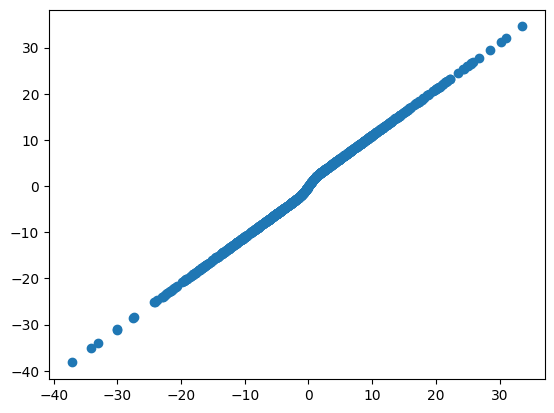

In [12]:
x = torch.randn(1000, 1)*10
y = 2 * x + torch.randn(1000, 1)*5
y1 = torch.tanh(x) + x
plt.figure()
plt.scatter(x, y1)

In [34]:
class CustomActivation(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = torch.nn.Linear(1, 1)

    def forward(self, x):
        x = self.layer(x)
        return x + torch.tanh(x)

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [35]:
train_dataset = CustomDataset(x, y)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
epochs = 1000
model = CustomActivation()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
mse = torch.nn.MSELoss()
for epoch in range(epochs):
    for x_train, y_train in train_loader:
        optimizer.zero_grad()
        pred = model(x_train)
        loss = mse(pred, y_train)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(f"epoch {epoch}, loss {loss}")


epoch 0, loss 1951.0296630859375
epoch 100, loss 654.8230590820312
epoch 200, loss 11301.9501953125
epoch 300, loss 6948.45751953125
epoch 400, loss 34051.70703125
epoch 500, loss 6775.62451171875
epoch 600, loss 13440.8037109375
epoch 700, loss 26994.26953125
epoch 800, loss 15382.974609375
epoch 900, loss 15562.2001953125
